## Inter Subject Coherence 

In [192]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy import signal
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import time
from progressbar import progressbar

In [193]:
def freq_scaling(f, old_sig, factor):
    len_new = 0
    for i in range (0, len(f),factor):
        len_new = len_new + 1

    f_new = np.zeros(shape=len_new)
    psd_new = np.zeros(shape=len_new)

    index = 0
    for i in range (0,len(f),factor):
        f_new[index] = f[i]
        psd_new[index] = psd[i]
        index = index + 1
    return f_new, psd_new

In [194]:
def get_coh(signal_1, signal_2):
    #f, coh = plt.cohere(F3_a, F3_b, 256, 1./.01)
    f, coh = signal.coherence(signal_1, signal_2, fs = 500, nperseg=1024)
    f, coh = get_freq_range(f, coh)
    return f, coh

In [195]:
def get_freq_range(f, coh):
    alpha_coh = []
    alpha_f = []

    for i in range (len(coh)):
        if (f[i] >= 4 and f[i] <= 20):
            alpha_coh.append(coh[i])
            alpha_f.append(f[i])
    return alpha_f, alpha_coh

In [196]:
def plot_coh(f, coh):
    plt.plot(f, coh)
    plt.ylim([0, 0.2])
    plt.grid()
    plt.show()

In [197]:
def plot_PSD(f, psd, title):
    plt.semilogy(f, psd)
    plt.ylim([1e-3, 100])
    plt.xlim([6, 30])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD')
    plt.title(title)
    plt.show()

In [198]:
f_sampling = 500
elec_name = ["F3","Fz","F4","FC1","FC2","C3","C4","CP1","CP2"]
no_of_electrode = len(elec_name)
no_of_subjects = 29

### For Resting State

In [199]:
RS_max_coh_arr = np.array([])
RS_max_coh_f_arr = np.array([])
RS_average_coh_arr = np.array([])

In [200]:
for electrode in progressbar(range (0,no_of_electrode)):   
    peak_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    peak_coh_f = np.zeros(shape=[no_of_subjects,no_of_subjects])
    average_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    for x in range (no_of_subjects):
        source_file_a = '../dataset/RS_individual/RS_'+str(x+1)+'.txt'

        Time_a, Fp1_a, Fz_a, F3_a, F7_a, FT9_a, FC5_a, FC1_a, C3_a, T7_a, TP9_a, CP5_a, CP1_a, Pz_a, P3_a, P7_a, O1_a, Oz_a, O2_a, P4_a, P8_a, TP10_a, CP6_a, CP2_a, C4_a, T8_a, FT10_a, FC6_a, FC2_a, F4_a, F8_a, Fp2_a = np.loadtxt( 
            source_file_a, 
            unpack = True)
        elec_1_mat = np.stack((F3_a, Fz_a, F4_a, FC1_a, FC2_a, C3_a, C4_a, CP1_a, CP2_a))
        # Only stacking motor region electrodes

        for y in range (no_of_subjects):
            source_file_b = '../dataset/RS_individual/RS_'+str(y+1)+'.txt'
            Time_b, Fp1_b, Fz_b, F3_b, F7_b, FT9_b, FC5_b, FC1_b, C3_b, T7_b, TP9_b, CP5_b, CP1_b, Pz_b, P3_b, P7_b, O1_b, Oz_b, O2_b, P4_b, P8_b, TP10_b, CP6_b, CP2_b, C4_b, T8_b, FT10_b, FC6_b, FC2_b, F4_b, F8_b, Fp2_b = np.loadtxt( 
                source_file_b,
                unpack = True)
            elec_2_mat = np.stack((F3_b, Fz_b, F4_b, FC1_b, FC2_b, C3_b, C4_b, CP1_b, CP2_b))
            # Only stacking motor region electrodes

            f, coh = get_coh(elec_1_mat[electrode], elec_2_mat[electrode])      
            max_coh = 0
            max_coh_f = 0
            sum_coh_alpha = 0

            for k in range(len(coh)):
                sum_coh_alpha = sum_coh_alpha + coh[k]
                if (max_coh < coh[k]):
                    max_coh = coh[k]
                    max_coh_f = f[k]

            peak_coh[x][y] = max_coh
            peak_coh_f[x][y] = max_coh_f
            average_coh[x][y] = (sum_coh_alpha/len(coh))

    #max_coh_arr.append((peak_coh[np.triu_indices(3)]))
    temp_coh_uppr = (np.triu(peak_coh, k=1))    
    temp_coh_f_uppr = (np.triu(peak_coh_f, k=1))
    temp_average_coh = (np.triu(average_coh, k=1))

    for p in range (no_of_subjects):
        for q in range (no_of_subjects):
            if (temp_coh_uppr[p][q] != 0):                
                RS_max_coh_arr = np.append(RS_max_coh_arr, temp_coh_uppr[p][q])
                RS_max_coh_f_arr = np.append(RS_max_coh_f_arr,temp_coh_f_uppr[p][q])
                RS_average_coh_arr = np.append(RS_average_coh_arr, temp_average_coh[p][q])       

100% (9 of 9) |##########################| Elapsed Time: 0:27:19 Time:  0:27:19


### For Deep Breathing

In [201]:
DB_max_coh_arr = np.array([])
DB_max_coh_f_arr = np.array([])
DB_average_coh_arr = np.array([])

In [202]:
for electrode in progressbar(range (0,no_of_electrode)):   
    peak_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    peak_coh_f = np.zeros(shape=[no_of_subjects,no_of_subjects])
    average_coh = np.zeros(shape=[no_of_subjects,no_of_subjects])
    for x in range (no_of_subjects):
        source_file_a = '../dataset/DB_individual/DB_'+str(x+1)+'.txt'

        Time_a, Fp1_a, Fz_a, F3_a, F7_a, FT9_a, FC5_a, FC1_a, C3_a, T7_a, TP9_a, CP5_a, CP1_a, Pz_a, P3_a, P7_a, O1_a, Oz_a, O2_a, P4_a, P8_a, TP10_a, CP6_a, CP2_a, C4_a, T8_a, FT10_a, FC6_a, FC2_a, F4_a, F8_a, Fp2_a = np.loadtxt( 
            source_file_a, 
            unpack = True)
        elec_1_mat = np.stack((F3_a, Fz_a, F4_a, FC1_a, FC2_a, C3_a, C4_a, CP1_a, CP2_a, P3_a, Pz_a, P4_a))
        
        for y in range (no_of_subjects):
            source_file_b = '../dataset/DB_individual/DB_'+str(y+1)+'.txt'
            Time_b, Fp1_b, Fz_b, F3_b, F7_b, FT9_b, FC5_b, FC1_b, C3_b, T7_b, TP9_b, CP5_b, CP1_b, Pz_b, P3_b, P7_b, O1_b, Oz_b, O2_b, P4_b, P8_b, TP10_b, CP6_b, CP2_b, C4_b, T8_b, FT10_b, FC6_b, FC2_b, F4_b, F8_b, Fp2_b = np.loadtxt( 
                source_file_b,
                unpack = True)
            elec_2_mat = np.stack((F3_b, Fz_b, F4_b, FC1_b, FC2_b, C3_b, C4_b, CP1_b, CP2_b, P3_b, Pz_b, P4_b))
            
            f, coh = get_coh(elec_1_mat[electrode], elec_2_mat[electrode])      
            max_coh = 0
            max_coh_f = 0
            sum_coh_alpha = 0

            for k in range(len(coh)):
                sum_coh_alpha = sum_coh_alpha + coh[k]
                if (max_coh < coh[k]):
                    max_coh = coh[k]
                    max_coh_f = f[k]

            peak_coh[x][y] = max_coh
            peak_coh_f[x][y] = max_coh_f
            average_coh[x][y] = (sum_coh_alpha/len(coh))
    
    #max_coh_arr.append((peak_coh[np.triu_indices(3)]))
    temp_coh_uppr = (np.triu(peak_coh, k=1))    
    temp_coh_f_uppr = (np.triu(peak_coh_f, k=1))
    temp_average_coh = (np.triu(average_coh, k=1))
    
    for p in range (no_of_subjects):
        for q in range (no_of_subjects):
            if (temp_coh_uppr[p][q] != 0):                
                DB_max_coh_arr = np.append(DB_max_coh_arr, temp_coh_uppr[p][q])
                DB_max_coh_f_arr = np.append(DB_max_coh_f_arr,temp_coh_f_uppr[p][q])
                DB_average_coh_arr = np.append(DB_average_coh_arr, temp_average_coh[p][q])

100% (9 of 9) |##########################| Elapsed Time: 0:24:28 Time:  0:24:28


### Scatter Plot of Resting State and Deep Breathing Coherence Peaks

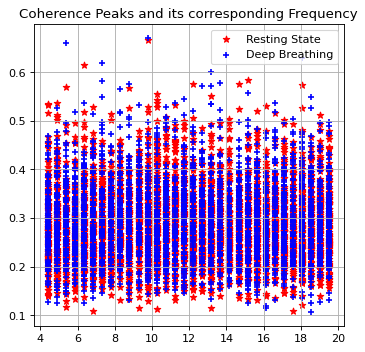

Comparing for every electrode 
 (A)Percent of RS coherence peaks occuring in (12-20)Hz freq range 
 (B)Percent of DB coherence peaks occuring in (4-12)Hz freq range


Name 	 A 	 B
F3 	 47 	 51


Fz 	 48 	 50


F4 	 51 	 50


FC1 	 51 	 48


FC2 	 52 	 51


C3 	 48 	 48


C4 	 54 	 50


CP1 	 52 	 54


CP2 	 52 	 48




In [211]:
plt.figure(figsize=(5,5), dpi=80)
plt.scatter(RS_max_coh_f_arr, RS_max_coh_arr, color='red', marker = '*')
plt.scatter(DB_max_coh_f_arr, DB_max_coh_arr, color='blue',marker = '+')
plt.title("Coherence Peaks and its corresponding Frequency")
plt.grid()
plt.legend(["Resting State" , "Deep Breathing"])
plt.show()

print ("Comparing for every electrode \n (A)Percent of RS coherence peaks occuring in (12-20)Hz freq range \n (B)Percent of DB coherence peaks occuring in (4-12)Hz freq range")
print ("\n")
print ("Name \t A \t B")
for t in range (9):
    RS_peak_beta = 0
    for i in range (t,len(RS_max_coh_arr),9):
        if (RS_max_coh_f_arr[i] >= 12):
        #if (RS_max_coh_f_arr[i] >= 4 and RS_max_coh_f_arr[i] <= 12):
            RS_peak_beta = RS_peak_beta + 1


    DB_peak_theta_alpha = 0
    for i in range (t,len(DB_max_coh_arr),9):
        if (DB_max_coh_f_arr[i] >= 4 and DB_max_coh_f_arr[i] <= 12):
            DB_peak_theta_alpha = DB_peak_theta_alpha + 1
    print (elec_name[t],"\t",round(RS_peak_beta/(len(RS_max_coh_f_arr)/9)*100),"\t",round((DB_peak_theta_alpha/(len(DB_max_coh_f_arr)/9))*100))
    print ("\n")

### Scatter Plot of Resting State and Deep Breathing Average Coherence

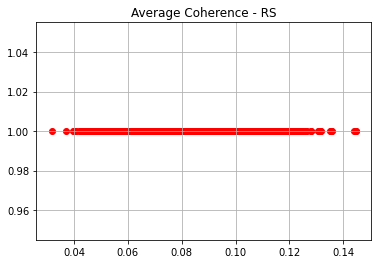

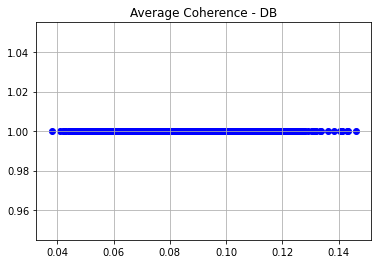

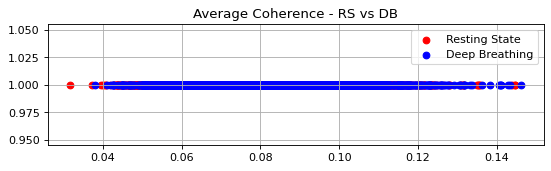

In [204]:
y_avg_val = np.ones(shape=[len(DB_average_coh_arr)])

plt.scatter(RS_average_coh_arr,y_avg_val, color='red')
plt.title("Average Coherence - RS")
plt.grid()
plt.show()

plt.scatter(DB_average_coh_arr,y_avg_val, color='blue')
plt.title("Average Coherence - DB")
plt.grid()
plt.show()

plt.figure(figsize=(8,2), dpi=80)
plt.scatter(RS_average_coh_arr,y_avg_val, color='red')
plt.scatter(DB_average_coh_arr,y_avg_val, color='blue')
plt.title("Average Coherence - RS vs DB")
plt.grid()
plt.legend(["Resting State" , "Deep Breathing"])
plt.show()